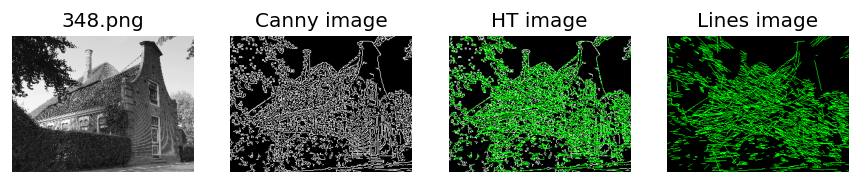

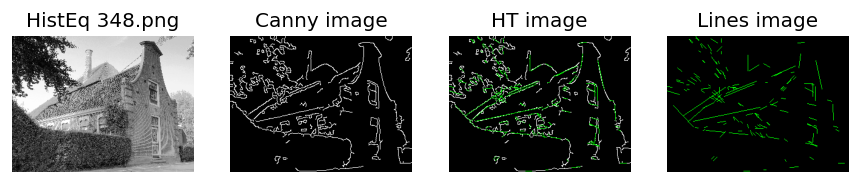

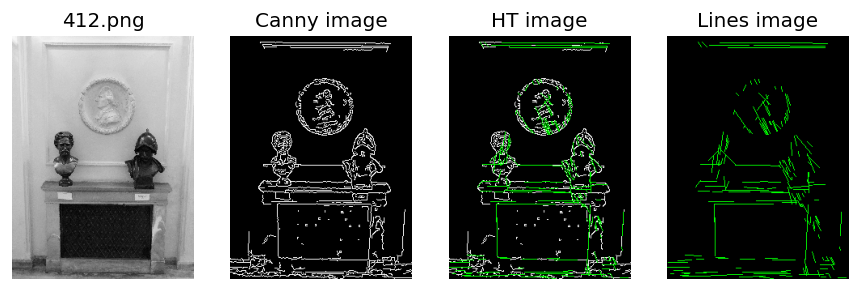

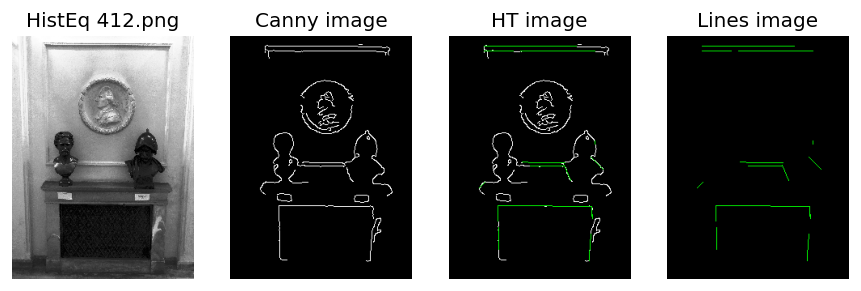

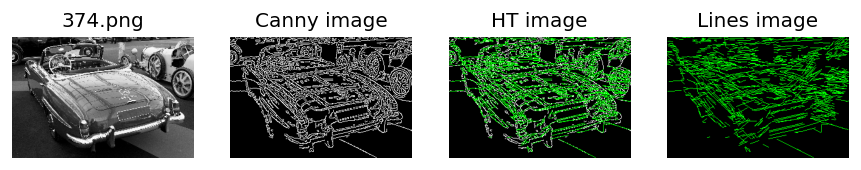

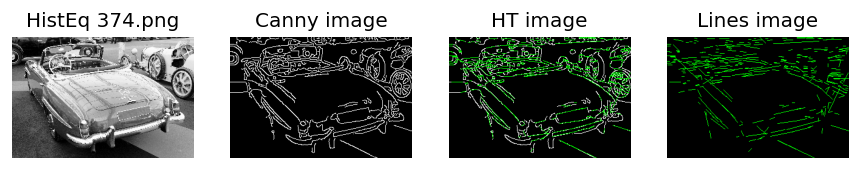

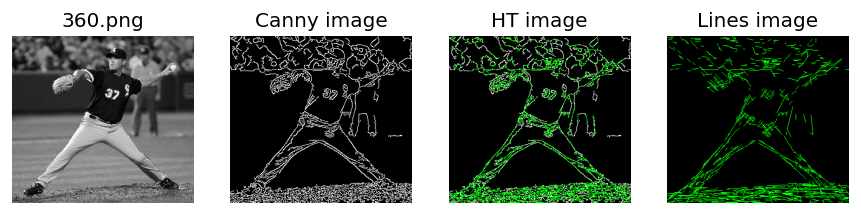

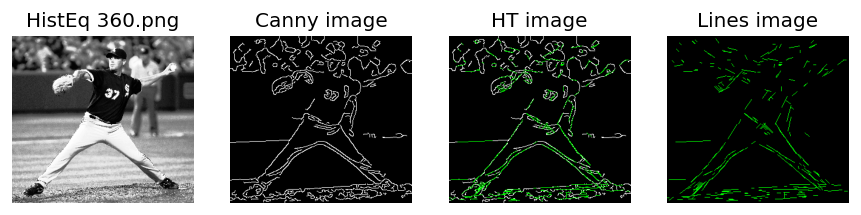

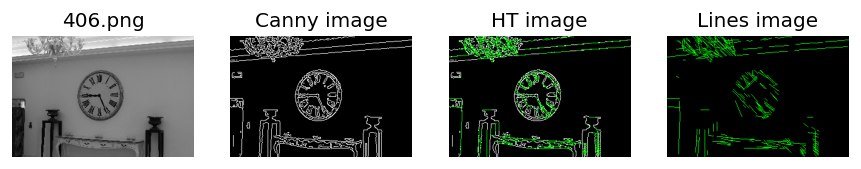

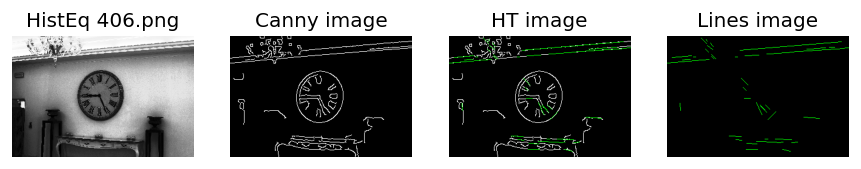

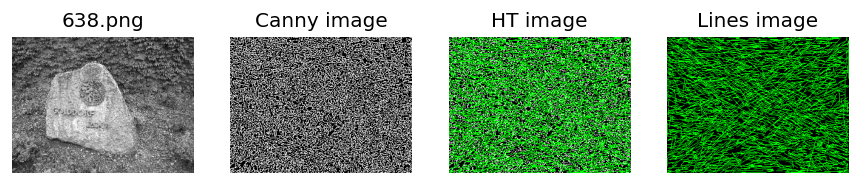

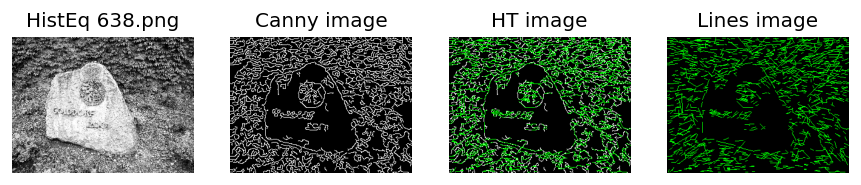

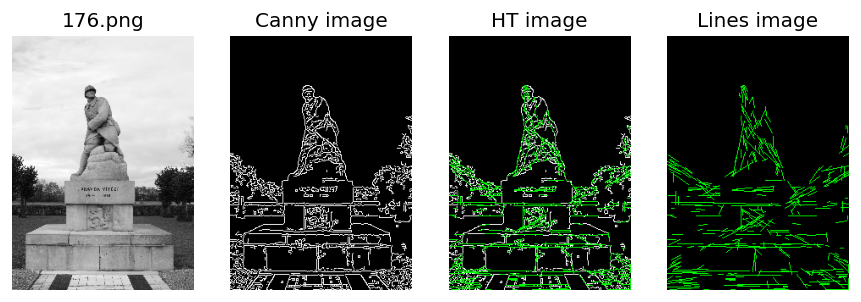

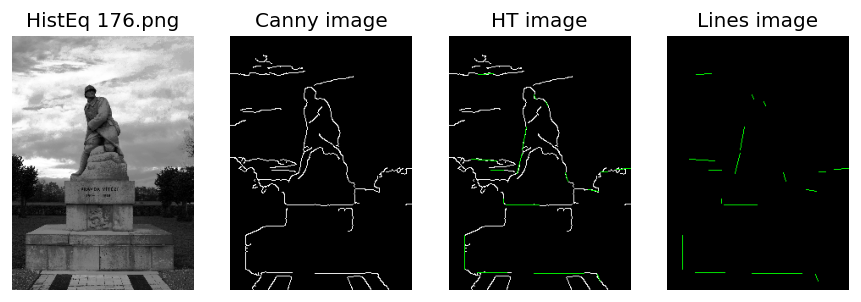

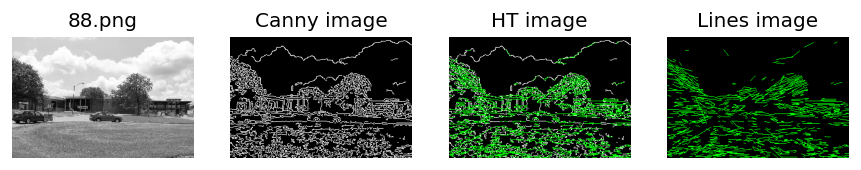

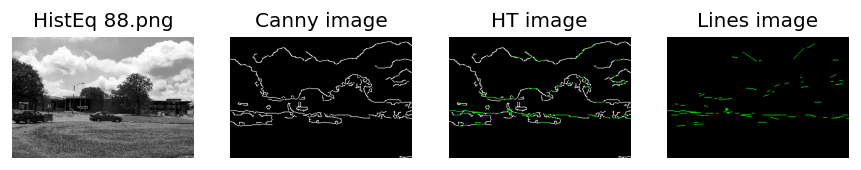

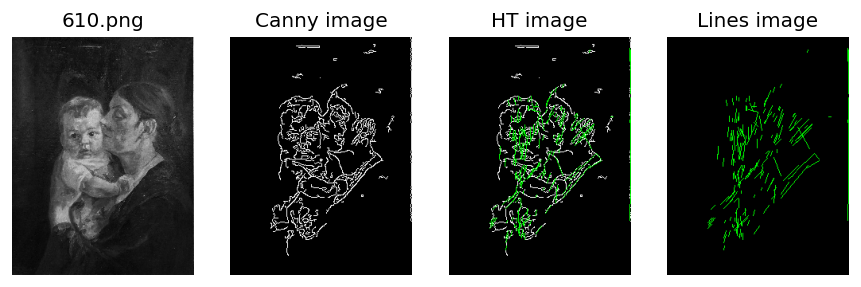

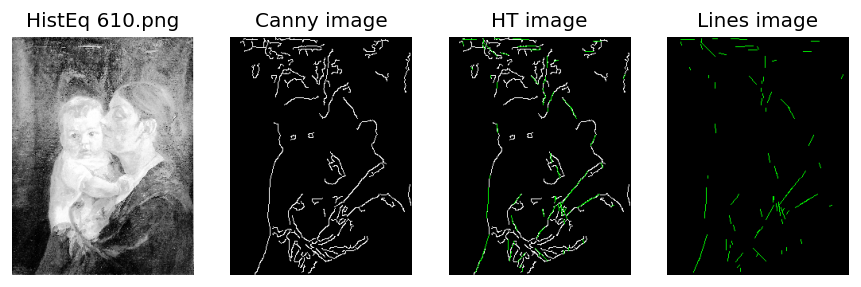

In [ ]:
import os
import sys
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

images_dir = "./images/300px/"

def msqErr(edges,lines):
    
    return 0

def houghP(new,cdst,blank):
    lines = cv.HoughLinesP(
                        new,
                        1,
                        np.pi / 180,
                        threshold = 35,#65,
                        minLineLength = 3,
                        maxLineGap=3
                        )
    if lines is not None:
        for points in lines:
            x1, y1, x2, y2 = points[0]
            cv.line(blank, (x1, y1), (x2, y2), (0, 255, 0), 1)
            cv.line(cdst, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
    return new,cdst,blank

def houghNP(new,cdst,blank):
    lines = cv.HoughLines(new, 1, np.pi / 180, 65, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(blank, pt1, pt2, (0, 255, 0), 1, cv.LINE_AA)
            cv.line(cdst, pt1, pt2, (0, 255, 0), 1, cv.LINE_AA)
    return new,cdst,blank

def preprocessed(image):#(original):
    kernel = np.ones((5,5),np.uint8)
    #edge_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    edge_image = image
    cv.equalizeHist(image,edge_image)
    edge_image = cv.GaussianBlur(edge_image, (5,5), 1)
    #edge_image = cv.Canny(edge_image, 75,175)#100, 200)
    edge_image = cv.dilate(
        edge_image,
        cv.getStructuringElement(cv.MORPH_RECT, (2,2)),
        iterations=1
    )
    edge_image = cv.erode(
        edge_image,
        cv.getStructuringElement(cv.MORPH_RECT, (2, 2)),
        iterations=1
    )
    edge_image = cv.GaussianBlur(edge_image, (3,3), 1)
    #edge_image = cv.Canny(edge_image, 75,175)#100, 200)
    edge_image = cv.dilate(
        edge_image,
        cv.getStructuringElement(cv.MORPH_RECT, (2, 2)),
        iterations=1
    )
    edge_image = cv.erode(
        edge_image,
        cv.getStructuringElement(cv.MORPH_RECT, (2, 2)),
        iterations=1
    )
    #edge_image = cv.Canny(edge_image, 75,175)#100, 200)
    edge_image = cv.Canny(edge_image, 75,175)#100, 200
    

    cdst = cv.cvtColor(edge_image, cv.COLOR_GRAY2BGR)
    blank = np.zeros((len(image),len(image[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2BGR)
    
    '''
    kernel = np.ones((5,5),np.uint8)
    kernelTwo = np.ones((2,2),np.uint8)
    kernelThree = np.ones((5,5),np.float32)/25
    
    equalized = cv.equalizeHist(original)
    closed = cv.morphologyEx(equalized, cv.MORPH_CLOSE, kernel)
    #dst = cv.filter2D(closed,-1,kernelThree)
    new = cv.Canny(closed, 75, 125, None,3)
    
    cdst = cv.cvtColor(new, cv.COLOR_GRAY2BGR)
    blank = np.zeros((len(original),len(original[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2BGR)
    
    #[vector][r][theta]
    #lines = cv.HoughLines(new, 1, np.pi / 180, 75, None, 0, 0
    
    #return houghNP(new,cdst,blank)
    
    #edges = cv.Canny(gray,50,150,apertureSize=3)
    '''
    return houghP(edge_image,cdst,blank)

def htrans(img):
    new = cv.Canny(img, 75, 175)
    cdst = cv.cvtColor(new, cv.COLOR_GRAY2RGB)
    blank = np.zeros((len(img),len(img[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2RGB)

    return houghP(new, cdst , blank)

def run():
    for file in os.listdir(images_dir):
        path = os.path.join(images_dir, file)
        if os.path.isfile(path):
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                res = htrans(img)
                plt.figure(figsize=(9,4), dpi=120)
                plt.margins(0,0)
                plt.subplot(1,4,1)
                plt.imshow(img, cmap="gray")
                plt.title(file)
                plt.axis('off')
                plt.subplot(1,4,2)
                plt.imshow(res[0], cmap="gray")
                plt.axis('off')
                plt.title('Canny image')
                plt.subplot(1,4,3)
                plt.title('HT image')
                plt.imshow(res[1])
                plt.axis('off')
                plt.subplot(1,4,4)
                plt.title('Lines image')
                plt.imshow(res[2])
                plt.axis('off')
                plt.show()
                
                resTwo = preprocessed(img)
                plt.figure(figsize=(9,4), dpi=120)
                plt.margins(0,0)
                plt.subplot(1,4,1)
                plt.imshow(img, cmap="gray")
                plt.axis('off')
                plt.title('HistEq ' + file)
                plt.subplot(1,4,2)
                plt.imshow(resTwo[0], cmap="gray")
                plt.axis('off')
                plt.title('Canny image')
                plt.subplot(1,4,3)
                plt.title('HT image')
                plt.imshow(resTwo[1])
                plt.axis('off')
                plt.subplot(1,4,4)
                plt.title('Lines image')
                plt.imshow(resTwo[2])
                plt.axis('off')
                plt.show()
    return 0

run()